In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

from unsupcon_loss import sim, contrastive_loss

2021-11-18 22:03:18.501469: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-18 22:03:18.540200: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-18 22:03:18.540401: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-18 22:03:18.541211: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

(100, 32, 32, 3)


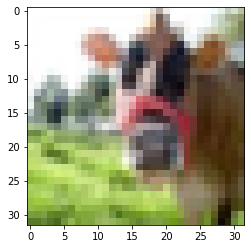

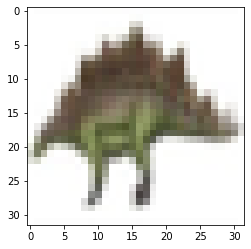

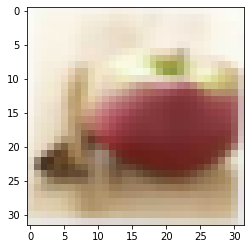

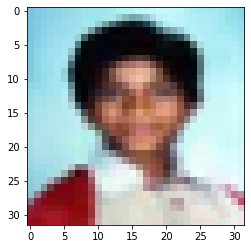

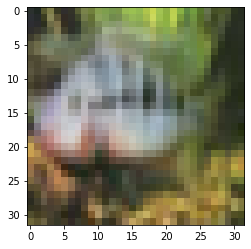

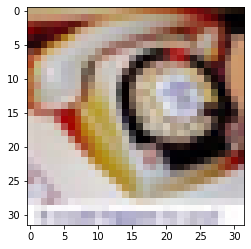

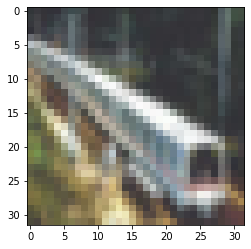

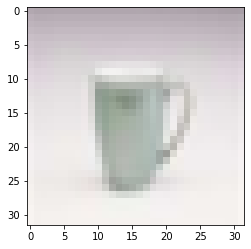

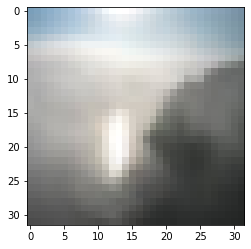

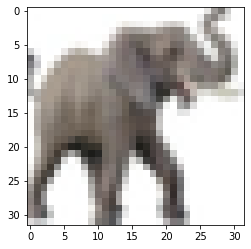

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()
X = X_train[:100]
X = tf.math.multiply(1./255, X)
print(np.shape(X))
N = 10
X_batches = tf.data.Dataset.from_tensor_slices(X).batch(N).take(1)
for batch in X_batches:
    for img in batch:
        plt.figure()
        plt.imshow(img)

In [3]:
for batch in X_batches:
    b_shape = tf.shape(batch)
    batch_l = tf.reshape(batch, (b_shape[0], b_shape[1] * b_shape[2], b_shape[3]))
    batch_z = tf.math.reduce_mean(batch_l, axis=2) #this is a bad encoding for demo purposes only
    print(tf.shape(batch_z))
    for k in range(N - 1):
        print(f"sim: {sim(batch_z[k], batch_z[k+1])}")
        print(f"unsupcon loss: {contrastive_loss(batch_z, k, k+1)}")

tf.Tensor([  10 1024], shape=(2,), dtype=int32)
sim: 0.87171870470047
unsupcon loss: 2.1815834045410156
sim: 0.9135200381278992
unsupcon loss: 2.155482530593872
sim: 0.8373923897743225
unsupcon loss: 2.2391605377197266
sim: 0.7828384041786194
unsupcon loss: 2.2471179962158203
sim: 0.8509966135025024
unsupcon loss: 2.1949312686920166
sim: 0.8487433195114136
unsupcon loss: 2.1967554092407227
sim: 0.8966600298881531
unsupcon loss: 2.131559133529663
sim: 0.8893406391143799
unsupcon loss: 2.2171499729156494
sim: 0.8106147646903992
unsupcon loss: 2.238619804382324
